<a href="https://colab.research.google.com/github/CaQtiml/Kaggle_Practice/blob/main/DateReformat_AttentionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Derived from Sequence Models course offered by Deeplearning.ai

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install Faker

     |████████████████████████████████| 1.2 MB 4.3 MB/s 


In [ ]:
from tensorflow.keras.layers import Bidirectional, Concatenate, Permute, Dot, Input, LSTM, Multiply
from tensorflow.keras.layers import RepeatVector, Dense, Activation, Lambda
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model, Model
import tensorflow.keras.backend as K
import tensorflow as tf
import numpy as np

from faker import Faker
import random
from tqdm import tqdm
from babel.dates import format_date
from nmt_utils import *
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
fake = Faker()
Faker.seed(12345)
random.seed(12345)

# Define format of the data we would like to generate
FORMATS = ['short',
           'medium',
           'long',
           'full',
           'full',
           'full',
           'full',
           'full',
           'full',
           'full',
           'full',
           'full',
           'full',
           'd MMM YYY', 
           'd MMMM YYY',
           'dd MMM YYY',
           'd MMM, YYY',
           'd MMMM, YYY',
           'dd, MMM YYY',
           'd MM YY',
           'd MMMM YYY',
           'MMMM d YYY',
           'MMMM d, YYY',
           'dd.MM.YY',
           'dd/MM/YYYY',
           'dd/MM/YYYY',
           'dd/MM/YYYY']

# change this if you want it to work with another language
LOCALES = ['en_US']

In [ ]:
dt = fake.date_object()
dt.isoformat()

'1998-05-09'

In [ ]:
def load_date():
    """
        Loads some fake dates 
        :returns: tuple containing human readable string, machine readable string, and date object
    """
    dt = fake.date_object()

    try:
        human_readable = format_date(dt, format=random.choice(FORMATS),  locale='en_US') # locale=random.choice(LOCALES))
        human_readable = human_readable.lower()
        human_readable = human_readable.replace(',','')
        machine_readable = dt.isoformat()
        
    except AttributeError as e:
        return None, None, None

    return human_readable, machine_readable, dt

In [ ]:
def load_dataset_custom(m):
    """
        Loads a dataset with m examples and vocabularies
        :m: the number of examples to generate
    """
    
    human_vocab = set()
    machine_vocab = set()
    dataset = []
    Tx = 30
    

    for i in tqdm(range(m)):
        h, m, _ = load_date()
        if h is not None:
            dataset.append((h, m))
            human_vocab.update(tuple(h))
            machine_vocab.update(tuple(m))
    
    human = dict(zip(sorted(human_vocab) + ['<unk>', '<pad>'], 
                     list(range(len(human_vocab) + 2))))
    inv_machine = dict(enumerate(sorted(machine_vocab)))
    machine = {v:k for k,v in inv_machine.items()}
 
    return dataset, human, machine, inv_machine

In [ ]:
# Don't forget to import "nmt_utils.py"

m = 10000
# dataset, human_vocab, machine_vocab, inv_machine_vocab = load_dataset(m)
dataset, human_vocab, machine_vocab, inv_machine_vocab = load_dataset_custom(m)

100%|██████████| 10000/10000 [00:00<00:00, 23946.73it/s]


In [ ]:
print(len(dataset))
print(human_vocab.items())
print(len(human_vocab))
print(machine_vocab.items())
print(inv_machine_vocab.items())

10000
dict_items([(' ', 0), ('.', 1), ('/', 2), ('0', 3), ('1', 4), ('2', 5), ('3', 6), ('4', 7), ('5', 8), ('6', 9), ('7', 10), ('8', 11), ('9', 12), ('a', 13), ('b', 14), ('c', 15), ('d', 16), ('e', 17), ('f', 18), ('g', 19), ('h', 20), ('i', 21), ('j', 22), ('l', 23), ('m', 24), ('n', 25), ('o', 26), ('p', 27), ('r', 28), ('s', 29), ('t', 30), ('u', 31), ('v', 32), ('w', 33), ('y', 34), ('<unk>', 35), ('<pad>', 36)])
37
dict_items([('-', 0), ('0', 1), ('1', 2), ('2', 3), ('3', 4), ('4', 5), ('5', 6), ('6', 7), ('7', 8), ('8', 9), ('9', 10)])
dict_items([(0, '-'), (1, '0'), (2, '1'), (3, '2'), (4, '3'), (5, '4'), (6, '5'), (7, '6'), (8, '7'), (9, '8'), (10, '9')])


In [ ]:
import random

for i in range(30):
    print(random.choice(dataset))

('5/12/87', '1987-05-12')
('27/08/1996', '1996-08-27')
('wednesday december 18 1974', '1974-12-18')
('08.05.02', '2002-05-08')
('tuesday january 13 2004', '2004-01-13')
('24/09/1977', '1977-09-24')
('sunday july 24 1983', '1983-07-24')
('1 september 1990', '1990-09-01')
('saturday june 19 1971', '1971-06-19')
('09 aug 2015', '2015-08-09')
('2 april 1975', '1975-04-02')
('31 oct 1980', '1980-10-31')
('17 mar 1981', '1981-03-17')
('11/02/1989', '1989-02-11')
('22 12 92', '1992-12-22')
('thursday december 25 2008', '2008-12-25')
('thursday september 30 1993', '1993-09-30')
('saturday july 31 2021', '2021-07-31')
('thursday january 25 2007', '2007-01-25')
('thursday february 8 2007', '2007-02-08')
('thursday january 6 1983', '1983-01-06')
('1 jun 1984', '1984-06-01')
('12 january 2008', '2008-01-12')
('thursday april 21 2011', '2011-04-21')
('sunday june 20 1971', '1971-06-20')
('14 february 1970', '1970-02-14')
('august 2 2010', '2010-08-02')
('tuesday september 26 1989', '1989-09-26')
('

In [ ]:
Tx = 30
Ty = 10
X, Y, Xoh, Yoh = preprocess_data(dataset, human_vocab, machine_vocab, Tx, Ty)

In [ ]:
print("X.shape:", X.shape)
print("Y.shape:", Y.shape)
print("Xoh.shape:", Xoh.shape) # (#batch,T_x,len(human_vocab))
print("Yoh.shape:", Yoh.shape)

X.shape: (10000, 30)
Y.shape: (10000, 10)
Xoh.shape: (10000, 30, 37)
Yoh.shape: (10000, 10, 11)


In [ ]:
def softmax(x, axis=1):
    """Softmax activation function.
    # Arguments
        x : Tensor.
        axis: Integer, axis along which the softmax normalization is applied.
    # Returns
        Tensor, output of softmax transformation.
    # Raises
        ValueError: In case `dim(x) == 1`.
    """
    ndim = K.ndim(x)
    if ndim == 2:
        return K.softmax(x)
    elif ndim > 2:
        # print(ndim)
        e = K.exp(x - K.max(x, axis=axis, keepdims=True))
        s = K.sum(e, axis=axis, keepdims=True)
        return e / s
    else:
        raise ValueError('Cannot apply softmax to a tensor that is 1D')

In [ ]:
# def one_step_attention(a, s_prev):
#     s_prev = RepeatVector(Tx)(s_prev)
#     concat = Concatenate(axis = -1)([a,s_prev])
#     e = Dense(10, activation = "tanh")(concat)
#     energies = Dense(1, activation = "relu")(e)
#     alphas = Activation(softmax, name='attention_weights')(energies)
#     context = Dot(axes = 1)([alphas,a])
#     return context

In [ ]:
# Defined shared layers as global variables
repeator = RepeatVector(Tx)
concatenator = Concatenate(axis=-1)
densor1 = Dense(10, activation = "tanh")
densor2 = Dense(1, activation = "relu")
activator = Activation(softmax, name='attention_weights') # Custom Softmax
dotor = Dot(axes = 1)

In [ ]:

def one_step_attention(a, s_prev):
    """
    Performs one step of attention: Outputs a context vector computed as a dot product of the attention weights
    "alphas" and the hidden states "a" of the Bi-LSTM.
    
    Arguments:
    a -- hidden state output of the Bi-LSTM, numpy-array of shape (m, Tx, 2*n_a)
    s_prev -- previous hidden state of the (post-attention) LSTM, numpy-array of shape (m, n_s)
    
    Returns:
    context -- context vector, input of the next (post-attention) LSTM cell
    """
    
    s_prev = repeator(s_prev)
    # print(s_prev.shape)
    # print(a.shape)
    concat = concatenator([a,s_prev])
    # print(concat.shape)
    e = densor1(concat)
    # print(e.shape)
    energies = densor2(e)
    # print(energies.shape)
    alphas = activator(energies)
    # print(alphas.shape)
    context = dotor([alphas,a])
    # print(context.shape)
    # print( " -------------------------")
    
    return context

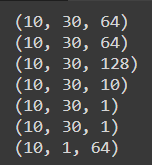

In [ ]:
n_a = 32 # number of units for the pre-attention, bi-directional LSTM's hidden state 'a'
n_s = 64 # number of units for the post-attention LSTM's hidden state "s"

post_activation_LSTM_cell = LSTM(n_s, return_state = True)
output_layer = Dense(len(machine_vocab), activation=softmax)

def modelf(Tx, Ty, n_a, n_s, human_vocab_size, machine_vocab_size):
    """
    Arguments:
    Tx -- length of the input sequence
    Ty -- length of the output sequence
    n_a -- hidden state size of the Bi-LSTM
    n_s -- hidden state size of the post-attention LSTM
    human_vocab_size -- size of the python dictionary "human_vocab"
    machine_vocab_size -- size of the python dictionary "machine_vocab"

    Returns:
    model -- Keras model instance
    """
    
    # Define the inputs of your model with a shape (Tx,)
    # Define s0 (initial hidden state) and c0 (initial cell state)
    # for the decoder LSTM with shape (n_s,)
    X = Input(shape=(Tx, human_vocab_size))
    s0 = Input(shape=(n_s,), name='s0')
    c0 = Input(shape=(n_s,), name='c0')
    s = s0
    c = c0
    
    # Initialize empty list of outputs
    outputs = []

    a = Bidirectional(LSTM(n_a, return_sequences = True))(X)

    for t in range(Ty):
        context = one_step_attention(a,s)
        s, _, c = post_activation_LSTM_cell(inputs=context, initial_state=[s, c])
        out = output_layer(s)
        outputs.append(out)
    
    model = Model(inputs = [X,s0,c0], outputs=outputs)

    return model

In [ ]:
# UNIT TEST
def one_step_attention_test(target):

    m = 10
    Tx = 30
    n_a = 32
    n_s = 64
    #np.random.seed(10)
    a = np.random.uniform(1, 0, (m, Tx, 2 * n_a)).astype(np.float32)
    s_prev =np.random.uniform(1, 0, (m, n_s)).astype(np.float32) * 1
    context = target(a, s_prev)
    
    # assert type(context) == tf.python.framework.ops.EagerTensor, "Unexpected type. It should be a Tensor"
    assert tuple(context.shape) == (m, 1, n_s), "Unexpected output shape"
    assert np.all(context.numpy() > 0), "All output values must be > 0 in this example"
    assert np.all(context.numpy() < 1), "All output values must be < 1 in this example"

    #assert np.allclose(context[0][0][0:5].numpy(), [0.50877404, 0.57160693, 0.45448175, 0.50074816, 0.53651875]), "Unexpected values in the result"
    print("\033[92mAll tests passed!")
    
one_step_attention_test(one_step_attention)

All tests passed!


In [ ]:
# UNIT TEST
from test_utils import *

def modelf_test(target):
    m = 10
    Tx = 30
    n_a = 32
    n_s = 64
    len_human_vocab = 37
    len_machine_vocab = 11
    
    
    model = target(Tx, Ty, n_a, n_s, len_human_vocab, len_machine_vocab)
    # model.summary()
    
    print(summary(model))

    
    expected_summary = [['InputLayer', [(None, 30, 37)], 0],
                         ['InputLayer', [(None, 64)], 0],
                         ['Bidirectional', (None, 30, 64), 17920],
                         ['RepeatVector', (None, 30, 64), 0, 30],
                         ['Concatenate', (None, 30, 128), 0],
                         ['Dense', (None, 30, 10), 1290, 'tanh'],
                         ['Dense', (None, 30, 1), 11, 'relu'],
                         ['Activation', (None, 30, 1), 0],
                         ['Dot', (None, 1, 64), 0],
                         ['InputLayer', [(None, 64)], 0],
                         ['LSTM',[(None, 64), (None, 64), (None, 64)], 33024,[(None, 1, 64), (None, 64), (None, 64)],'tanh'],
                         ['Dense', (None, 11), 715, 'softmax']]

    assert len(model.outputs) == 10, f"Wrong output shape. Expected 10 != {len(model.outputs)}"

    comparator(summary(model), expected_summary)
    

modelf_test(modelf)

[['InputLayer', [(None, 30, 37)], 0], ['InputLayer', [(None, 64)], 0], ['Bidirectional', (None, 30, 64), 17920], ['RepeatVector', (None, 30, 64), 0, 30], ['Concatenate', (None, 30, 128), 0], ['Dense', (None, 30, 10), 1290, 'tanh'], ['Dense', (None, 30, 1), 11, 'relu'], ['Activation', (None, 30, 1), 0], ['Dot', (None, 1, 64), 0], ['InputLayer', [(None, 64)], 0], ['LSTM', [(None, 64), (None, 64), (None, 64)], 33024, [(None, 1, 64), (None, 64), (None, 64)], 'tanh'], ['Dense', (None, 11), 715, 'softmax']]
All tests passed!


In [ ]:
model = modelf(Tx, Ty, n_a, n_s, len(human_vocab), len(machine_vocab))

In [ ]:
# initial_learning_rate = 0.0025
# lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate,
#     decay_steps=45,
#     decay_rate=0.9)

In [ ]:
opt = Adam(learning_rate=0.005, beta_1=0.9, beta_2=0.999, decay = 0.01) # Adam(..., decay = 0.01) 
model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])

In [ ]:
s0 = np.zeros((m, n_s))
c0 = np.zeros((m, n_s))
outputs = list(Yoh.swapaxes(0,1))

In [ ]:
print(Yoh.shape)
print(Yoh.swapaxes(0,1).shape)

(10000, 10, 11)
(10, 10000, 11)


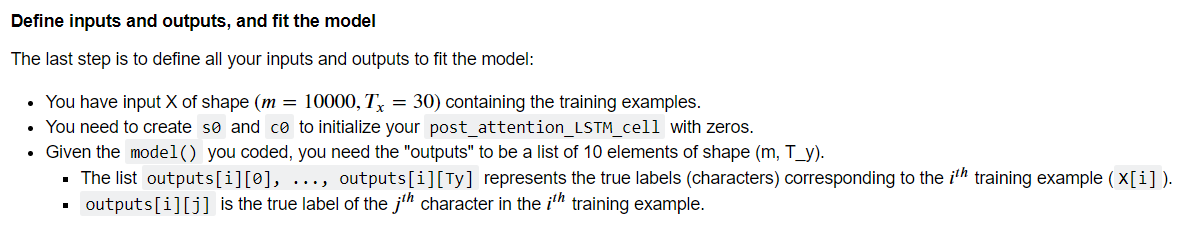

In [ ]:
model.fit([Xoh, s0, c0], outputs, epochs=50, batch_size=100)

In [ ]:
model.save("model_convert_date_2.h5")

In [ ]:
EXAMPLES = ['3 May 1979', '5 April 09', '21th of August 2016', 'Tue 10 Jul 2007', 'Saturday May 9 2018', 'March 3 2001', 'March 3rd 2001', '1 March 2001']
s00 = np.zeros((1, n_s))
c00 = np.zeros((1, n_s))
for example in EXAMPLES:
    source = string_to_int(example, Tx, human_vocab)
    source = np.array(list(map(lambda x: to_categorical(x, num_classes=len(human_vocab)), source))).swapaxes(0,1)
    source = np.swapaxes(source, 0, 1)
    source = np.expand_dims(source, axis=0)
    prediction = model.predict([source, s00, c00])
    prediction = np.argmax(prediction, axis = -1)
    output = [inv_machine_vocab[int(i)] for i in prediction]
    print("source:", example)
    print("output:", ''.join(output),"\n")

**Extra (Some Explained)**

In [ ]:
print(type(human_vocab))
print(human_vocab.items())
print(inv_machine_vocab.items())

<class 'dict'>
dict_items([(' ', 0), ('.', 1), ('/', 2), ('0', 3), ('1', 4), ('2', 5), ('3', 6), ('4', 7), ('5', 8), ('6', 9), ('7', 10), ('8', 11), ('9', 12), ('a', 13), ('b', 14), ('c', 15), ('d', 16), ('e', 17), ('f', 18), ('g', 19), ('h', 20), ('i', 21), ('j', 22), ('l', 23), ('m', 24), ('n', 25), ('o', 26), ('p', 27), ('r', 28), ('s', 29), ('t', 30), ('u', 31), ('v', 32), ('w', 33), ('y', 34), ('<unk>', 35), ('<pad>', 36)])
dict_items([(0, '-'), (1, '0'), (2, '1'), (3, '2'), (4, '3'), (5, '4'), (6, '5'), (7, '6'), (8, '7'), (9, '8'), (10, '9')])


In [ ]:
def string_to_int(string, length, vocab):
    """
    Converts all strings in the vocabulary into a list of integers representing the positions of the
    input string's characters in the "vocab"
    
    Arguments:
    string -- input string, e.g. 'Wed 10 Jul 2007'
    length -- the number of time steps you'd like, determines if the output will be padded or cut
    vocab -- vocabulary, dictionary used to index every character of your "string"
    
    Returns:
    rep -- list of integers (or '<unk>') (size = length) representing the position of the string's character in the vocabulary
    """
    
    #make lower to standardize
    string = string.lower()
    string = string.replace(',','')
    
    if len(string) > length:
        string = string[:length]
        
    rep = list(map(lambda x: vocab.get(x, '<unk>'), string))
    
    if len(string) < length:
        rep += [vocab['<pad>']] * (length - len(string))
    
    #print (rep)
    return rep

In [ ]:
EXAMPLES = ['3 May 1979', '5 April 09', '21th of August 2016', 'Tue 10 Jul 2007', 'Saturday May 9 2018', 'March 3 2001', 'March 3rd 2001', '1 March 2001']
s00 = np.zeros((1, n_s))
c00 = np.zeros((1, n_s))
for example in EXAMPLES:
    source = string_to_int(example, Tx, human_vocab)
    source = np.array(list(map(lambda x: to_categorical(x, num_classes=len(human_vocab)), source)))
    source = np.expand_dims(source, axis=0)
    prediction = model.predict([source, s00, c00])
    prediction = np.argmax(prediction, axis = -1)
    output = [inv_machine_vocab[int(i)] for i in prediction]
    print("source:", example)
    print("output:", ''.join(output),"\n")

source: 3 May 1979
output: 1979-05-03 

source: 5 April 09
output: 2009-04-05 

source: 21th of August 2016
output: 2016-08-20 

source: Tue 10 Jul 2007
output: 2007-07-10 

source: Saturday May 9 2018
output: 2018-05-09 

source: March 3 2001
output: 2011-03-03 

source: March 3rd 2001
output: 2011-03-03 

source: 1 March 2001
output: 2011-03-01 



In [ ]:
EXAMPLES = ["12/08/1975"]
s00 = np.zeros((1, n_s))
c00 = np.zeros((1, n_s))
for example in EXAMPLES:
    source = string_to_int(example, Tx, human_vocab)
    source = np.array(list(map(lambda x: to_categorical(x, num_classes=len(human_vocab)), source)))
    source = np.expand_dims(source, axis=0)
    prediction = model.predict([source, s00, c00])
    prediction = np.argmax(prediction, axis = -1)
    output = [inv_machine_vocab[int(i)] for i in prediction]
    print("source:", example)
    print("output:", ''.join(output),"\n")

source: 12/08/1975
output: 1975-08-18 

